# Guided Project: Clean and Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Data Source:

https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey

https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey

In this project our main question is:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
# importing the csv files downloaded from the site above
dete_survey = pd.read_csv('dete.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_2.csv')

In [3]:
# the dete survey has 56 columns, many of which we do not need for our analysis
dete_survey.shape

(822, 56)

In [4]:
#dete_survey.info()

In [5]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
# checking for null values; we wee many column with high counts of null values
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

## Cleaning Step 1 - dealing with null values

The dete survey included columns with null values set as 'Not Stated', I set those to null at the pd.read_csv import

Both surveys included way more columns than we need for our analysis so I used the drop method to get rid of unnecessary columns

In [7]:
# checking the size of the dete survey dataframe
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.shape

(822, 35)

In [8]:
# checking the size of the tafe survey df
tafe_survey.shape

(702, 72)

In [9]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [10]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.340000e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 – 30,Temporary Full-time,Administration (AO),2-Jan,2-Jan
1,6.340000e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.340000e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.340000e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.340000e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 – 45,Permanent Full-time,Teacher (including LVT),4-Mar,4-Mar


In [11]:
# tafe survey null values
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [12]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.shape

(702, 23)

In [13]:
#happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()

## Cleaning Step 2 - cleaning columns

Using str methods to clean the colums of the dete survey

I used the df.rename method to clean the columns of tafe_survey

In [14]:
# here I will lower case all columns, strip whitespaces, and replace spaces between words with an underscore
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [15]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [16]:
# listing all columns
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [17]:
# here I will rename some of the columns we will be using from the tafe survey dataset
tafe_survey_updated.rename(columns={'Record ID':'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, inplace=True)

In [18]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service
0,6.340000e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 – 30,Temporary Full-time,Administration (AO),2-Jan,2-Jan
1,6.340000e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.340000e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.340000e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.340000e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),4-Mar,4-Mar


In [19]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors Int Conf', 'Contributing Factors. Study',
       'Contributing Factors. Travel', 'Contributing Factors. Other',
       'Contributing Factors. NONE', 'Gender.     What is your Gender?',
       'CurrentAge.     Current Age', 'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')

## Cleaning Step 3 - removing unnecessary data

Our analysis is only around resignations so we will drop additional uncessary data


In [20]:
# we will first get the unique values in each datasets sepearationtype column
# here we see there are 3 different values we need to include in our analysis
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [21]:
# I'll create a mask that looks for strings containing 'Resignation'
# this will capture the 3 values needed above
dete_resig = dete_survey_updated['separationtype'].str.contains('Resignation')

In [22]:
# here I'll apply the mask to our original dataset and create a new dataframe
dete_resignations = dete_survey_updated[dete_resig]

In [23]:
# checking to make sure we only have resignation data
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [24]:
# we will do the same for tafe but since there is only one 'Resignation' value we will just slice the original dataset 
# for that value
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [25]:
# here I am slicing the original dataset for 'seprationtype' values that equal 'Resignation'
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']

In [26]:
# checking to make sure we only have resignation data
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

## Cleaning Step 4 - cleaning resignation data

Our analysis is will use the separation/resignation dates so we will need to clean the values in the 

cease_date in dete_resignations since some are just year and some are month-year


In [27]:
# we see that the dates are inconsistenet
# wee only need the year for our analysis
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [28]:
# we will extract the last 4 strings to get the year and convert it to a float data type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype(float)

C:\Users\carlo\Anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
# cease date now only contains year values
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [30]:
dete_resignations.head(1)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN


In [31]:
# dete start date in dete resignations only contain year values
dete_resignations['dete_start_date'].value_counts().iloc[:10]

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
Name: dete_start_date, dtype: int64

In [32]:
# case_dates in tafe resignations are the right data type and contain only year values
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [33]:
# tafe resignations contains a institute_service column indicating the length of employee service
# we need to manually create this for dete resignations
tafe_resignations.sample(1)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service
606,6.350000e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2012.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,51-55,Permanent Full-time,Teacher (including LVT),10-Jul,10-Jul


In [34]:
# adding a new column to get the years of service and saving it as institute_service to match the tafe df
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

C:\Users\carlo\Anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Cleaning Step 5 - cleaning dissatified data columns

We now need to identify the employees who resigned due to being dissatisfied from each dataframe

We will clean the columns that contain this data to only contain True/False values

We'll use these columns to classify dissatisfaction:

tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

detesurveyupdated:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload


In [35]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [36]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [37]:
# function to replace values in columns to True/False
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [38]:
# here we apply the function above and add a new column if either of the values in either column is true
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)

tafe_resignations['dissatisfied'].value_counts()

C:\Users\carlo\Anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False    241
True      91
Name: dissatisfied, dtype: int64

In [39]:
dete_resignations.head(1)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0


In [40]:
# we will now add a new column to the dete resignations; we don't need to apply the funciton here because the columns
# already save the values as T/F

columns = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment','lack_of_recognition',
           'lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']

dete_resignations['dissatisfied'] = dete_resignations[columns].any(1, skipna=False)

dete_resignations['dissatisfied'].value_counts()

C:\Users\carlo\Anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


False    162
True     149
Name: dissatisfied, dtype: int64

In [41]:
dete_resignations['job_dissatisfaction'].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

## Cleaning Step 6 - combining the data

Now that I have cleaned the data and added the calculated column in each that we will use to aggregate the data, it is now time to combine the data

We want to group our data by years of service, 'institute_service'


In [42]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
2-Jan                 64
4-Mar                 63
6-May                 33
20-Nov                26
10-Jul                21
More than 20 years    10
Name: institute_service, dtype: int64

In [43]:
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

In [44]:
# we'll add a column to be able to distinguish which dataset the data is from
tafe_resignations['institute'] = 'TAFE'
dete_resignations['institute'] = 'DETE'

C:\Users\carlo\Anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\carlo\Anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
# we will ues pd.concat to combine the datasets vertically, axis=0 by default
combined = pd.concat([tafe_resignations, dete_resignations], sort=False)

In [46]:
combined.shape

(651, 57)

In [47]:
# we still have a lot of columns with a lot of null values and we don't need those for this analysis
combined.isnull().sum()

id                                                       0
Institute                                              311
WorkArea                                               311
cease_date                                              16
separationtype                                           0
Contributing Factors. Career Move - Public Sector      319
Contributing Factors. Career Move - Private Sector     319
Contributing Factors. Career Move - Self-employment    319
Contributing Factors. Ill Health                       319
Contributing Factors. Maternity/Family                 319
Contributing Factors. Dissatisfaction                  319
Contributing Factors. Job Dissatisfaction              319
Contributing Factors Int Conf                          319
Contributing Factors. Study                            319
Contributing Factors. Travel                           319
Contributing Factors. Other                            319
Contributing Factors. NONE                             3

In [48]:
combined_updated = combined.dropna(thresh=500, axis=1)

In [49]:
combined_updated.isnull().sum()

id                    0
cease_date           16
separationtype        0
institute_service    88
dissatisfied          8
institute             0
dtype: int64

## Cleaning Step 7 - cleaning the analysis column

In [50]:
# the values in our analysis column are not grouped in the same way
combined_updated['institute_service'].value_counts(dropna=False)[:10]

NaN                 88
Less than 1 year    73
2-Jan               64
4-Mar               63
6-May               33
20-Nov              26
5.0                 23
1.0                 22
10-Jul              21
0.0                 20
Name: institute_service, dtype: int64

In [51]:
# here we'll extract the digit representing the years of service using regular expression
# first we need to covnert the column to a string
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')

C:\Users\carlo\Anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
# we'll convert the column back to a float
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

C:\Users\carlo\Anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
combined_updated['institute_service_up'].value_counts(dropna=False)

 1.0     95
NaN      88
 4.0     79
 2.0     78
 6.0     50
 20.0    43
 10.0    27
 5.0     23
 0.0     20
 3.0     20
 9.0     14
 7.0     13
 13.0     8
 8.0      8
 15.0     7
 22.0     6
 17.0     6
 12.0     6
 14.0     6
 18.0     5
 16.0     5
 24.0     4
 23.0     4
 11.0     4
 32.0     3
 39.0     3
 19.0     3
 21.0     3
 30.0     2
 36.0     2
 26.0     2
 28.0     2
 25.0     2
 35.0     1
 38.0     1
 34.0     1
 33.0     1
 49.0     1
 41.0     1
 27.0     1
 42.0     1
 29.0     1
 31.0     1
Name: institute_service_up, dtype: int64

We will create a function in order to group the years of service into one of these categories

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [54]:
# function to group years of service into categories
# order matters; also need to deal with nulls correctly
def years_of_serv(val):
    if val >= 11:
        return 'Veteran'
    elif 7 <= val < 11:
        return 'Established'
    elif 3 <= val < 7:
        return 'Experienced'
    elif pd.isnull(val):
        return np.nan
    else:
        return 'New'

In [55]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(years_of_serv)

C:\Users\carlo\Anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
combined_updated[combined_updated['service_cat'] == 'Veteran'].head()

,id,cease_date,separationtype,institute_service,dissatisfied,institute,institute_service_up,service_cat
13,6.340000e+17,2010.0,Resignation,20-Nov,False,TAFE,20.0,Veteran
15,6.340000e+17,2010.0,Resignation,20-Nov,False,TAFE,20.0,Veteran
27,6.340000e+17,2010.0,Resignation,More than 20 years,False,TAFE,20.0,Veteran
41,6.340000e+17,2010.0,Resignation,20-Nov,False,TAFE,20.0,Veteran
45,6.340000e+17,2010.0,Resignation,20-Nov,False,TAFE,20.0,Veteran


In [57]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [58]:
combined_updated.columns

Index(['id', 'cease_date', 'separationtype', 'institute_service',
       'dissatisfied', 'institute', 'institute_service_up', 'service_cat'],
      dtype='object')

## Cleaning Step 8 - cleaning the dissatisfied column for analysis

In [59]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [60]:
# here we'll replace those 8 missing values with the most comman value
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

C:\Users\carlo\Anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
# now we will calculate the percentage of employees to resigned due to dissatisfaction
dissatisfied_per = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

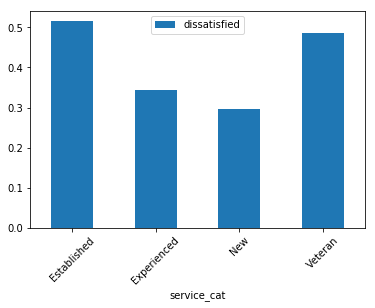

In [62]:
%matplotlib inline
dissatisfied_per.plot(kind='bar', rot=45)

# Observations

## Based on this analysis we can observe that more experienced employees resign due to dissatisfaction and newer employees less so. We may be able to imply that newer employees stick with it longer than established employees.